In [1]:
import xgboost
import shap
from sklearn.linear_model import LinearRegression

# train two models
X, y = shap.datasets.boston()
model1 = xgboost.XGBRegressor(random_state=42).fit(X, y)
model2 = LinearRegression().fit(X, y)
preds1 = model1.predict(X)
preds2 = model2.predict(X)
# explain the models' predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer1 = shap.Explainer(model1)
shap_values1 = explainer1(X)
explainer2 = shap.LinearExplainer(model2,X)
shap_values2 = explainer2(X)


c:\Users\Nicol\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(1))
model3.compile(loss='mse', optimizer='adam')
model3.fit(X_train, y_train, epochs=50)
scoreNN = model3.evaluate(X_test, y_test, verbose=0)
print("Test loss:", scoreNN)

Epoch 1/50
13/13 [==============================] - 0s 3ms/step - loss: 1126.0206
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 381.1656
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 179.9756
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 133.2403
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 115.1219
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 101.4267
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 93.4571
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 85.3891
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 81.3055
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 76.4467
Epoch 11/50
13/13 [==============================] - 0s 594us/step - loss: 72.5329
Epoch 12/50
13/13 [==============================] - 0s 1ms/step - loss: 70.0160
Epoch 13/50
13/13 [=========

In [3]:
preds3 = model3.predict(X)
explainer3 = shap.DeepExplainer(model3, X.values)
shap_values3 = explainer3.shap_values(X.values)
print(shap_values3)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


keras is no longer supported, please use tf.keras instead.


[array([[ 0.47780285,  0.28128889,  0.48389506, ...,  0.76370765,
         2.25757417,  5.45991579],
       [ 0.46765428, -1.03251735,  0.15420614, ...,  0.14946477,
         2.21791389,  2.41889496],
       [ 0.47587708, -0.89233382,  0.10929327, ...,  0.15018617,
         1.82572221,  6.20771249],
       ...,
       [ 0.48392974, -0.9955729 , -0.48373333, ..., -0.65229401,
         2.07148164,  4.9763435 ],
       [ 0.48207998, -0.97535345, -0.47934571, ..., -0.6506236 ,
         1.73873659,  4.35671639],
       [ 0.49194639, -0.90907401, -0.47499652, ..., -0.65354083,
         2.02158975,  3.33477599]])]


In [4]:
# Saving results not scaled to perform decision tree

with open("two_models_preds_results.txt", "w") as f:
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds3[i]))
        f.write("\n")

In [5]:
# Decision Tree

# We create new dataset with differences in output predictions and original feature values
import pandas as pd

new_df = pd.DataFrame()
diffs = []
for i in range(0,len(y)):
    diffs.append(preds1[i]-preds3[i])


In [6]:
from sklearn import tree

modelTree = tree.DecisionTreeRegressor(max_depth=4)
modelTree = modelTree.fit(X, diffs)

In [7]:
modelTree.predict(X)

array([-2.903649  , -2.903649  ,  1.56495274,  1.56495274,  1.56495274,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
       -2.903649  , -2.903649  , -2.903649  ,  0.42223417, -2.903649  ,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
        0.42223417, -2.903649  ,  0.42223417, -2.903649  , -2.903649  ,
        0.42223417, -2.903649  ,  0.42223417,  0.42223417,  0.42223417,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
        1.56495274, -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
        1.56495274, -2.903649  , -2.903649  , -2.903649  , -2.903649  ,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  ,  1.56495274,
       -2.903649  , -2.903649  , -2.903649  , -2.903649  , -2.90

[Text(0.5595238095238095, 0.9, 'X[5] <= 7.437\nsquared_error = 30.913\nsamples = 506\nvalue = -0.644'),
 Text(0.2619047619047619, 0.7, 'X[7] <= 1.172\nsquared_error = 21.565\nsamples = 476\nvalue = -1.379'),
 Text(0.09523809523809523, 0.5, 'X[5] <= 5.007\nsquared_error = 60.952\nsamples = 3\nvalue = 19.066'),
 Text(0.047619047619047616, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 8.028'),
 Text(0.14285714285714285, 0.3, 'X[11] <= 357.015\nsquared_error = 0.049\nsamples = 2\nvalue = 24.585'),
 Text(0.09523809523809523, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 24.364'),
 Text(0.19047619047619047, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 24.807'),
 Text(0.42857142857142855, 0.5, 'X[11] <= 375.695\nsquared_error = 18.648\nsamples = 473\nvalue = -1.509'),
 Text(0.3333333333333333, 0.3, 'X[12] <= 4.665\nsquared_error = 25.772\nsamples = 123\nvalue = 0.824'),
 Text(0.2857142857142857, 0.1, 'squared_error = 14.238\nsamples = 3\nvalue = 16.912'),
 Text(0.38095238095238093, 0.1

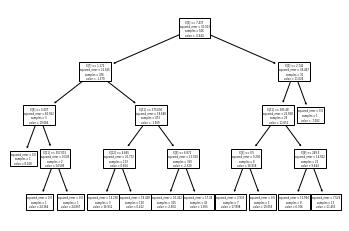

In [8]:
tree.plot_tree(modelTree)

In [9]:
score = modelTree.score(X, diffs)
print(score)

0.5807085270097491


In [10]:
import numpy as np

max_y = max(y)
for i in range(0, len(y)):
    preds1[i] = preds1[i] / max_y
    preds3[i] = preds3[i] / max_y

with open("two_models_preds_shaps.txt", "w") as f:
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds3[i]))
        f.write(", ")
        tmp_lst1 = []
        tmp_lst2 = []
        for j in range(0, len(shap_values1[i].values)):
            tmp_lst1.append(str(shap_values1[i].values[j]))
            tmp_lst1.append(", ")
        tmp_strng1 = ''.join(tmp_lst1)
        f.write(tmp_strng1)
        tmp_lst3 = []
        for j in range(0, len(shap_values3[0][i])):
            tmp_lst3.append(str(shap_values3[0][i][j]))
            tmp_lst3.append(", ")
        tmp_strng3 = ''.join(tmp_lst3)
        nw_ts3 = tmp_strng3[:-2]
        f.write(nw_ts3)
        f.write("\n")

CLUSTERING ON DIFFERENCES OF SHAP VALUES

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [12]:
N = len(X)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [13]:
shap_diffs = []
for i in range(0, len(y)):
    cur_shaps = []
    for j in range(0,len(shap_values1[i].values)):
        cur_d = shap_values1[i].values[j] - shap_values3[0][i][j]
        cur_shaps.append(cur_d)
    shap_diffs.append(cur_shaps)

In [14]:
df = pd.DataFrame(shap_diffs)
feature_names = list(X.columns)
df.columns = feature_names

In [15]:
# Load libraries and modules
import pandas as pd
from sklearn import preprocessing
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [16]:
from sklearn.metrics import silhouette_score

# Extract the features into X
X1 = df.iloc[:, 1:].values

# Calculate the silhouette score for different numbers of clusters
scores = []
for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = np.argmax(scores) + 2
print("Optimal number of clusters =", optimal_n_clusters)


For n_clusters = 2 The average silhouette_score is : 0.41085514360893144
For n_clusters = 3 The average silhouette_score is : 0.4503266486205464
For n_clusters = 4 The average silhouette_score is : 0.2803091778351417
For n_clusters = 5 The average silhouette_score is : 0.2889569763227907
For n_clusters = 6 The average silhouette_score is : 0.3016102130323658
For n_clusters = 7 The average silhouette_score is : 0.29597720033047276
For n_clusters = 8 The average silhouette_score is : 0.3040829838287232
For n_clusters = 9 The average silhouette_score is : 0.28632630685090493
For n_clusters = 10 The average silhouette_score is : 0.28332020741777725
For n_clusters = 11 The average silhouette_score is : 0.2580965507404667
For n_clusters = 12 The average silhouette_score is : 0.2062861747173113
For n_clusters = 13 The average silhouette_score is : 0.21182542678824998
For n_clusters = 14 The average silhouette_score is : 0.2346881683063135
For n_clusters = 15 The average silhouette_score is : 

In [17]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(df)
labels=kmeans.labels_
df['cluster'] = labels
print(kmeans.cluster_centers_)

[[-2.73260811e-02 -8.47362761e-01 -3.88768633e-01 -6.34224078e-02
   3.59458884e-01  8.02439088e+00  8.75365640e-01  1.63267763e-01
  -2.42912270e-01 -1.76555170e-01 -5.02230471e-04 -1.35920672e+00
   1.63423650e+00]
 [ 5.57248790e-01  2.26299972e-01 -2.43739518e-02  6.54471866e-02
  -3.73448693e-01 -1.08169415e+00 -1.82289692e+00  4.00282660e-01
   4.81036997e-01 -3.56071598e+00 -5.12753601e-02  7.06678635e+00
  -2.11975748e-01]
 [ 4.87056085e-02  8.23610121e-02  2.01756144e-02  2.99395826e-03
   8.24826118e-02 -1.36964356e+00  2.83283155e-03  2.83345832e-01
  -7.89417089e-02  6.09410059e-01  4.39153862e-02 -1.03892395e+00
  -1.51694724e-01]]


In [18]:
print(df)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.906305 -0.347926 -0.406035  0.093211 -0.725039 -2.250141  0.472806   
1   -0.627132  0.993308 -0.250756  0.096263  0.192277 -1.788417 -0.970699   
2   -0.538137  0.853093 -0.272818  0.094137  0.638921  3.685840  0.781981   
3   -0.221020  0.991329 -0.601322  0.095174  0.556348  1.391648  1.597967   
4    0.177002  1.055188 -0.617125  0.092135  0.380359  4.185760  1.398744   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.188562  0.691281  0.387701  0.106843  0.091480 -0.613235 -0.124533   
502 -0.564066  0.879547  0.435332  0.089954 -0.024866 -2.271273 -0.674035   
503 -0.830855  0.994438  0.384983  0.091242  0.178599  2.764246 -2.658679   
504 -0.127097  0.960885  0.395377  0.099946  0.041710 -0.031740 -2.470430   
505 -1.418787  0.906492  0.215141  0.080533 -0.225012 -4.353392 -2.293379   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  cluster  


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

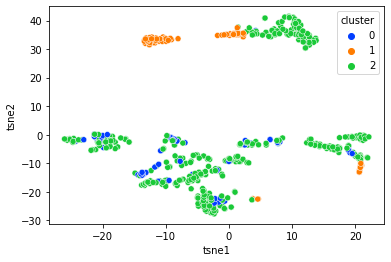

In [19]:
# t-SNE and scatterplot on original dataset, coloring it basing on cluster beloning

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df2 = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df2['label'] = y
df2['cluster'] = df['cluster']

sns.scatterplot(data=df2, x='tsne1', y='tsne2', hue='cluster', palette='bright')


In [20]:
print(df2)

         tsne1      tsne2  label  cluster
0    -5.985981 -18.982468   24.0        2
1   -21.094858  -5.223569   21.6        2
2   -19.880117  -4.513474   34.7        0
3   -19.683243  -2.165659   33.4        2
4   -20.375982  -2.435800   36.2        0
..         ...        ...    ...      ...
501 -10.494150 -16.719791   22.4        2
502 -11.539647 -16.827658   20.6        2
503 -12.970198 -16.576031   23.9        2
504 -12.833033 -16.647923   22.0        2
505 -12.010520 -16.757193   11.9        2

[506 rows x 4 columns]


In [21]:
counts = df2['cluster'].value_counts()
print(counts)

2    384
1     65
0     57
Name: cluster, dtype: int64
